In [2]:
import os, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('sobar-72.csv', sep= ',')

In [29]:
data.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


In [30]:
data.dtypes

behavior_sexualRisk           int64
behavior_eating               int64
behavior_personalHygine       int64
intention_aggregation         int64
intention_commitment          int64
attitude_consistency          int64
attitude_spontaneity          int64
norm_significantPerson        int64
norm_fulfillment              int64
perception_vulnerability      int64
perception_severity           int64
motivation_strength           int64
motivation_willingness        int64
socialSupport_emotionality    int64
socialSupport_appreciation    int64
socialSupport_instrumental    int64
empowerment_knowledge         int64
empowerment_abilities         int64
empowerment_desires           int64
ca_cervix                     int64
dtype: object

In [31]:
data_orig = data.copy()

In [32]:
#for clustering first we drop the target column
feature_columns = [x for x in data.columns if x not in ['ca_cervix']]

In [33]:
#converting all to float
for col in data[feature_columns].columns:
    data[col] = data[col].astype(np.float)

In [34]:
data.dtypes

behavior_sexualRisk           float64
behavior_eating               float64
behavior_personalHygine       float64
intention_aggregation         float64
intention_commitment          float64
attitude_consistency          float64
attitude_spontaneity          float64
norm_significantPerson        float64
norm_fulfillment              float64
perception_vulnerability      float64
perception_severity           float64
motivation_strength           float64
motivation_willingness        float64
socialSupport_emotionality    float64
socialSupport_appreciation    float64
socialSupport_instrumental    float64
empowerment_knowledge         float64
empowerment_abilities         float64
empowerment_desires           float64
ca_cervix                       int64
dtype: object

In [35]:
# The correlation matrix
corr_mat = data[feature_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(feature_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires
behavior_sexualRisk,0.000000,-0.165857,0.003912,-0.005779,0.126616,-0.067541,-0.057420,0.057869,0.158799,0.175791,0.067469,-0.041937,0.309357,0.076449,0.102404,0.104478,0.173936,0.206222,0.285072
behavior_eating,-0.165857,0.000000,0.224623,0.116634,0.116075,0.124197,0.307610,0.038376,-0.048262,-0.000407,-0.077467,-0.141732,-0.077380,-0.076671,-0.013382,0.061665,0.060272,-0.015987,0.052121
behavior_personalHygine,0.003912,0.224623,0.000000,0.441812,0.009613,0.152173,-0.118433,0.237063,0.252655,0.139975,0.252095,0.386605,0.432542,0.388862,0.354117,0.097603,0.444124,0.391971,0.199207
intention_aggregation,-0.005779,0.116634,0.441812,0.000000,0.265216,-0.039642,-0.175529,0.116701,0.059118,-0.044997,0.061595,0.337717,0.277540,0.188725,0.080188,0.035303,0.267148,0.106073,0.127319
intention_commitment,0.126616,0.116075,0.009613,0.265216,0.000000,-0.005897,0.229804,0.012453,-0.031610,-0.012274,-0.022190,0.180654,0.104314,0.000796,0.016037,0.015975,0.145965,0.056755,0.176077
attitude_consistency,-0.067541,0.124197,0.152173,-0.039642,-0.005897,0.000000,0.201706,0.187284,0.202935,0.180230,0.231020,0.062041,-0.089630,-0.170591,-0.045223,-0.066155,0.044390,-0.088804,-0.092052
attitude_spontaneity,-0.057420,0.307610,-0.118433,-0.175529,0.229804,0.201706,0.000000,-0.138451,-0.101091,-0.075221,-0.101405,-0.051348,-0.109238,-0.090397,-0.132567,0.061354,0.134418,0.030986,0.107343
norm_significantPerson,0.057869,0.038376,0.237063,0.116701,0.012453,0.187284,-0.138451,0.000000,0.643154,0.605689,0.636146,0.145434,0.054963,-0.037541,-0.214654,-0.248162,-0.102884,-0.049040,-0.123428
norm_fulfillment,0.158799,-0.048262,0.252655,0.059118,-0.031610,0.202935,-0.101091,0.643154,0.000000,0.792727,0.853534,0.130784,0.064407,-0.107139,-0.165258,-0.308588,-0.001287,0.032818,-0.112513
perception_vulnerability,0.175791,-0.000407,0.139975,-0.044997,-0.012274,0.180230,-0.075221,0.605689,0.792727,0.000000,0.809409,0.097417,0.098339,0.004194,-0.036572,-0.063245,0.153103,0.172650,0.126936


In [36]:
corr_mat.abs().idxmax()

behavior_sexualRisk               motivation_willingness
behavior_eating                     attitude_spontaneity
behavior_personalHygine            empowerment_knowledge
intention_aggregation            behavior_personalHygine
intention_commitment               intention_aggregation
attitude_consistency                 perception_severity
attitude_spontaneity                     behavior_eating
norm_significantPerson                  norm_fulfillment
norm_fulfillment                     perception_severity
perception_vulnerability             perception_severity
perception_severity                     norm_fulfillment
motivation_strength               motivation_willingness
motivation_willingness        socialSupport_emotionality
socialSupport_emotionality         empowerment_abilities
socialSupport_appreciation    socialSupport_emotionality
socialSupport_instrumental    socialSupport_appreciation
empowerment_knowledge              empowerment_abilities
empowerment_abilities          

In [38]:
skew_columns = (data[feature_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns < -0.75]
skew_columns

attitude_spontaneity    -0.854840
intention_aggregation   -1.025822
behavior_eating         -1.288417
intention_commitment    -1.323381
motivation_strength     -1.467241
behavior_sexualRisk     -4.726348
dtype: float64

In [39]:
#performing log transform to remove skewness from data
for col in skew_columns.index:
    data[col] = np.log1p(data[col])

In [40]:
#performing scaling to bring all the features on the same scale
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[feature_columns] = sc.fit_transform(data[feature_columns])

data.head(4)

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,0.244074,0.159853,0.304267,-1.244246,-2.970217,1.203152,0.860115,-1.159390,-0.099748,-0.356554,-0.707394,0.429204,-0.413116,-0.735053,0.289642,0.379106,0.336305,0.404687,-0.511741,1
1,0.244074,-0.564930,-0.027661,0.684157,0.318883,-0.119397,-0.978939,1.022992,-0.715338,-1.063120,-1.003512,0.636472,0.805914,-0.260400,-0.057928,-1.253965,-1.277960,-1.280951,-1.410408,1
2,0.244074,0.787688,-2.683082,-2.493620,0.318883,0.541878,0.860115,-1.159390,-0.920534,-0.356554,-1.003512,-1.589600,-1.632146,-1.209707,-0.057928,0.145810,-1.739179,-1.521756,1.060926,1
3,0.244074,-0.564930,-0.359588,0.684157,0.656571,-0.119397,-0.978939,-1.159390,-0.715338,-1.063120,-1.003512,0.636472,0.805914,-0.260400,-0.753070,-1.487260,-1.508570,-1.280951,-1.410408,1


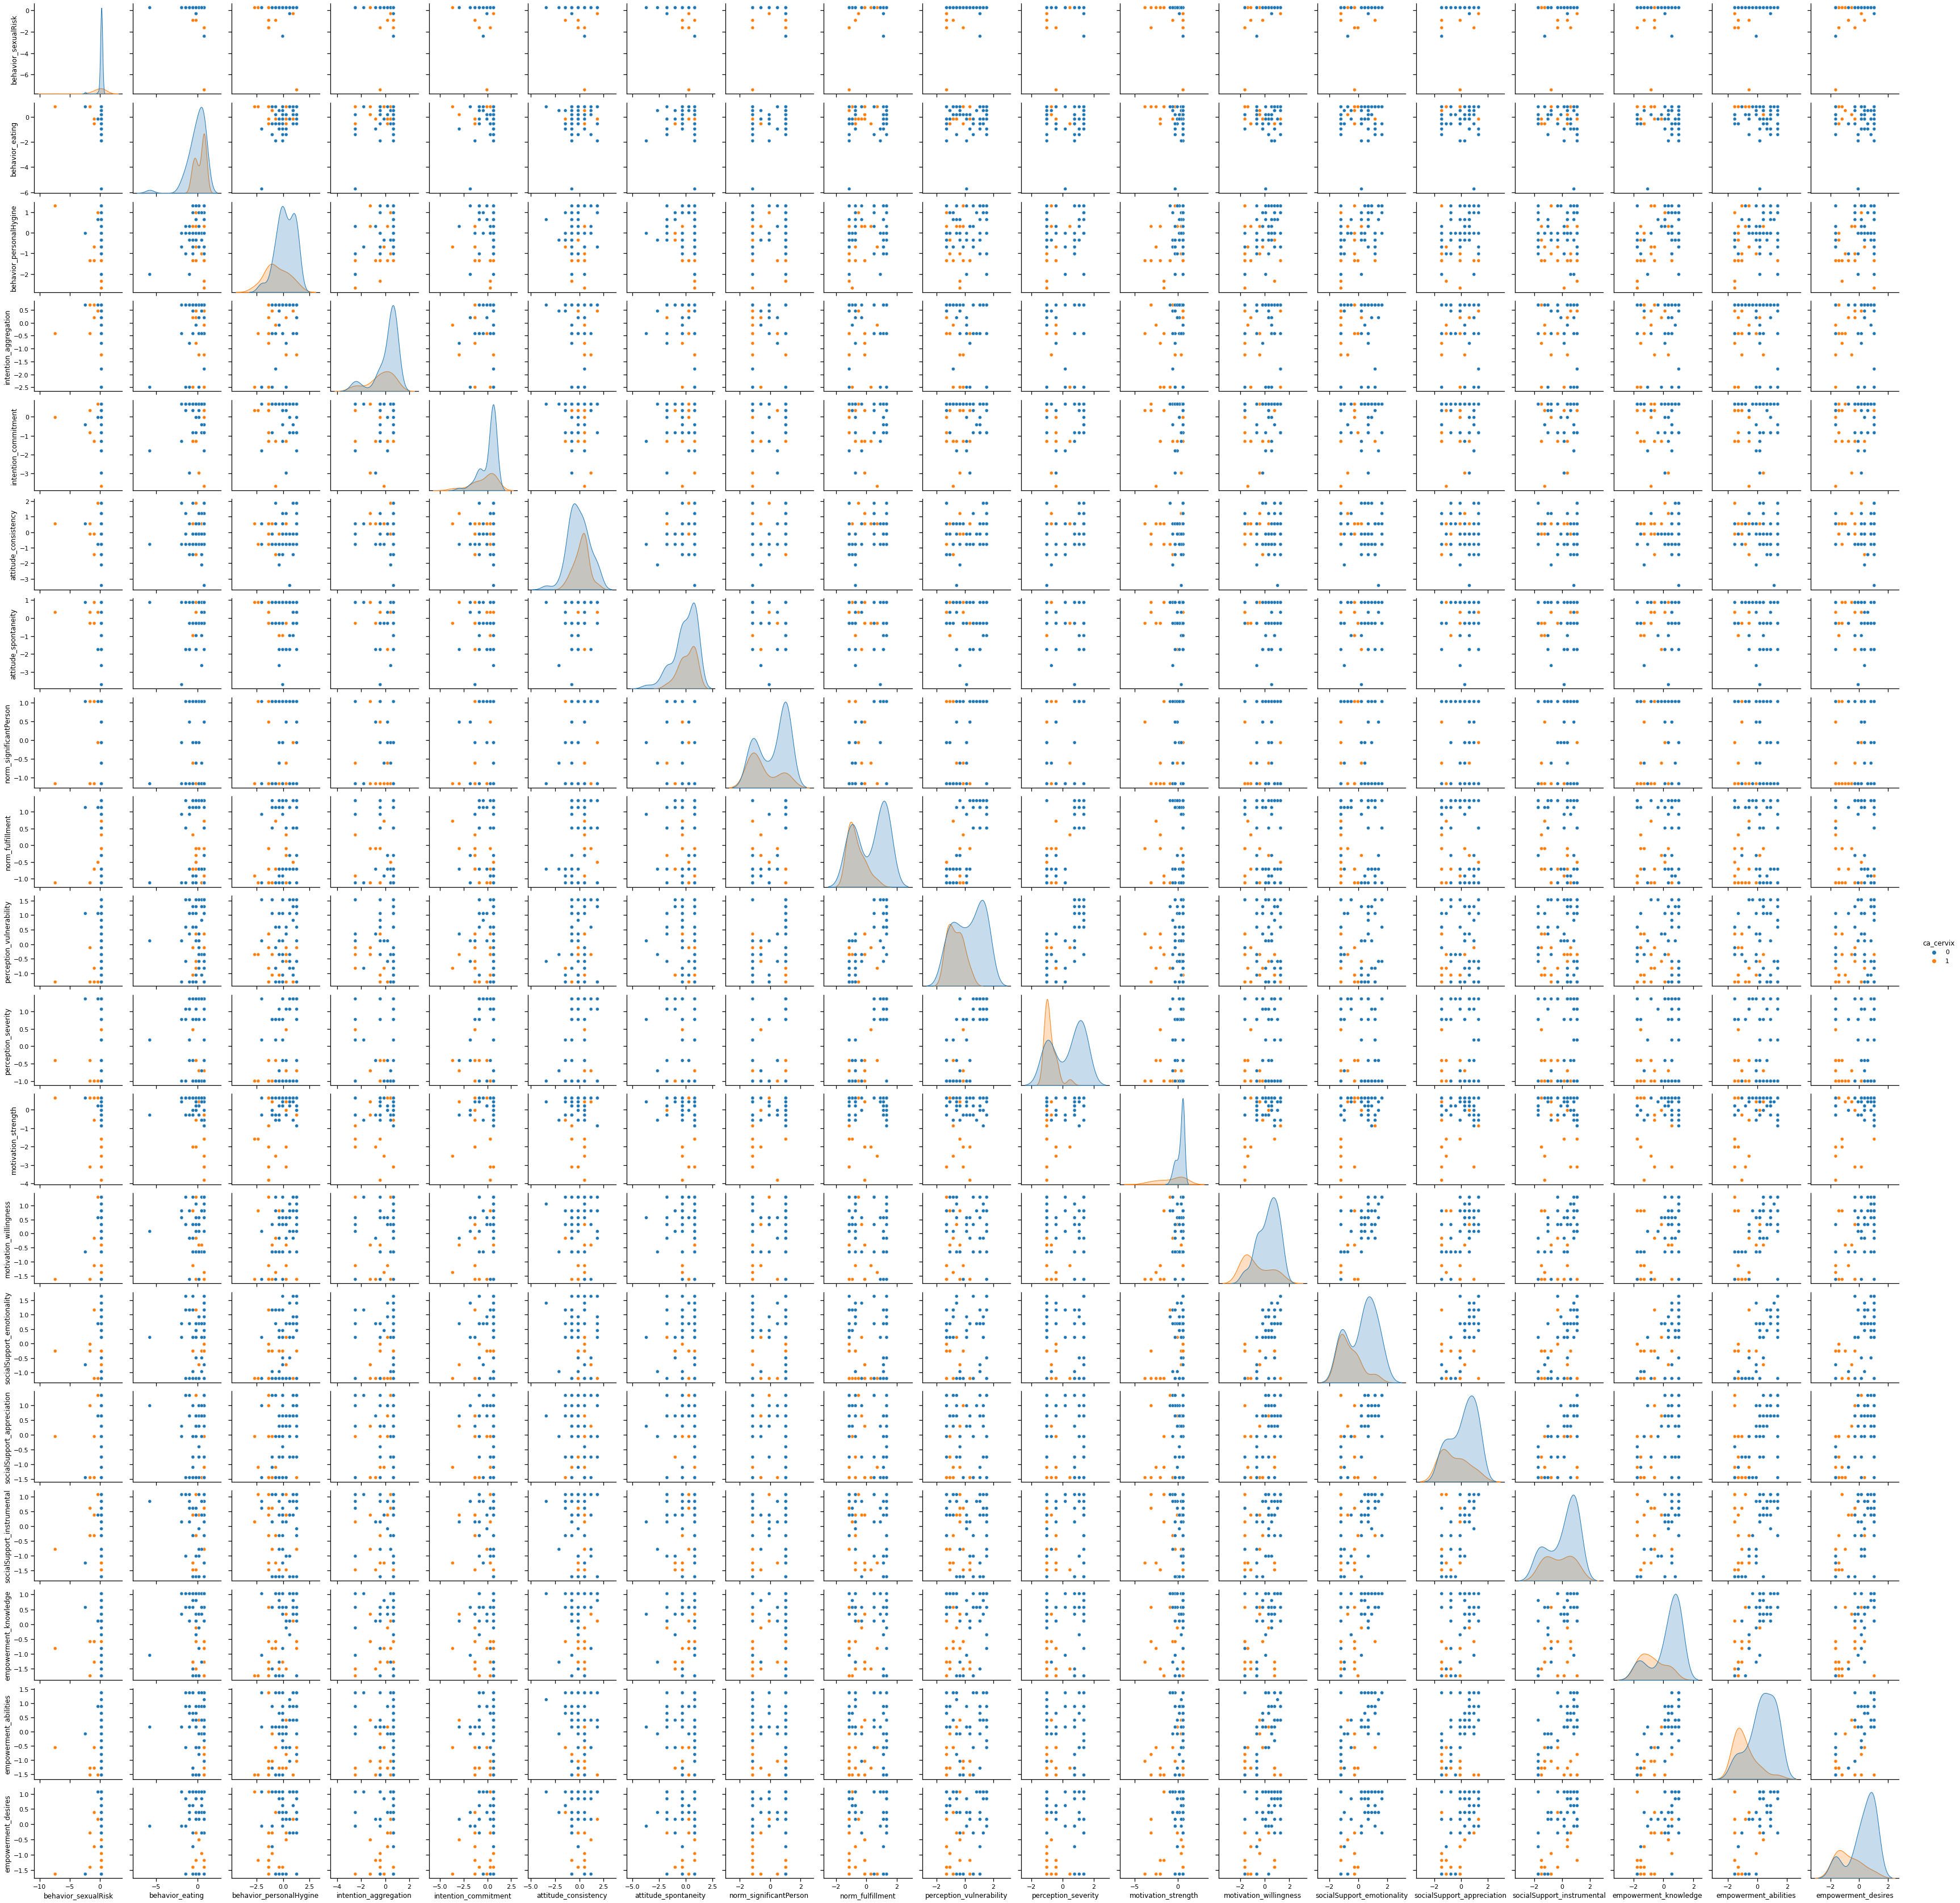

In [49]:
sns.set_context('notebook')
sns.pairplot(data[feature_columns + ['ca_cervix']], hue='ca_cervix');

In [50]:
from sklearn.cluster import KMeans
### BEGIN SOLUTION
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data[feature_columns])

data['kmeans'] = km.predict(data[feature_columns])

In [51]:
(data[['ca_cervix','kmeans']]
 .groupby(['kmeans','ca_cervix'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
kmeans ca_cervix        
0      0              40
       1               4
1      0              11
       1              17

In [56]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[feature_columns])
data['agglom'] = ag.fit_predict(data[feature_columns])

In [57]:
(data[['ca_cervix','agglom','kmeans']]
 .groupby(['ca_cervix','agglom'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
ca_cervix agglom        
0         0           35
          1           16
1         0            4
          1           17

In [59]:
data.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,...,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix,kmeans,agglom
0,0.244074,0.159853,0.304267,-1.244246,-2.970217,1.203152,0.860115,-1.159390,-0.099748,-0.356554,...,-0.413116,-0.735053,0.289642,0.379106,0.336305,0.404687,-0.511741,1,0,0
1,0.244074,-0.564930,-0.027661,0.684157,0.318883,-0.119397,-0.978939,1.022992,-0.715338,-1.063120,...,0.805914,-0.260400,-0.057928,-1.253965,-1.277960,-1.280951,-1.410408,1,1,1
2,0.244074,0.787688,-2.683082,-2.493620,0.318883,0.541878,0.860115,-1.159390,-0.920534,-0.356554,...,-1.632146,-1.209707,-0.057928,0.145810,-1.739179,-1.521756,1.060926,1,1,1
3,0.244074,-0.564930,-0.359588,0.684157,0.656571,-0.119397,-0.978939,-1.159390,-0.715338,-1.063120,...,0.805914,-0.260400,-0.753070,-1.487260,-1.508570,-1.280951,-1.410408,1,1,1
4,-0.939244,-0.564930,-1.355371,0.193358,-1.303956,-0.119397,-0.298748,-1.159390,-0.715338,-1.298641,...,-1.144534,-1.209707,-0.057928,0.379106,-1.277960,-1.280951,-0.736408,1,1,1


In [60]:
data_clustered = data.copy()

In [74]:
data.drop(columns = ['kmeans','agglom'], axis = 1)

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,0.244074,0.159853,0.304267,-1.244246,-2.970217,1.203152,0.860115,-1.159390,-0.099748,-0.356554,-0.707394,0.429204,-0.413116,-0.735053,0.289642,0.379106,0.336305,0.404687,-0.511741,1
1,0.244074,-0.564930,-0.027661,0.684157,0.318883,-0.119397,-0.978939,1.022992,-0.715338,-1.063120,-1.003512,0.636472,0.805914,-0.260400,-0.057928,-1.253965,-1.277960,-1.280951,-1.410408,1
2,0.244074,0.787688,-2.683082,-2.493620,0.318883,0.541878,0.860115,-1.159390,-0.920534,-0.356554,-1.003512,-1.589600,-1.632146,-1.209707,-0.057928,0.145810,-1.739179,-1.521756,1.060926,1
3,0.244074,-0.564930,-0.359588,0.684157,0.656571,-0.119397,-0.978939,-1.159390,-0.715338,-1.063120,-1.003512,0.636472,0.805914,-0.260400,-0.753070,-1.487260,-1.508570,-1.280951,-1.410408,1
4,-0.939244,-0.564930,-1.355371,0.193358,-1.303956,-0.119397,-0.298748,-1.159390,-0.715338,-1.298641,-1.003512,0.636472,-1.144534,-1.209707,-0.057928,0.379106,-1.277960,-1.280951,-0.736408,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.244074,0.484242,0.968122,0.684157,0.656571,-0.780671,-0.978939,1.022992,1.336627,1.292099,1.365434,0.636472,0.805914,0.214253,0.637213,0.379106,0.336305,0.404687,-0.287074,0
68,0.244074,-0.188587,1.300050,0.684157,0.656571,0.541878,-0.298748,1.022992,1.336627,1.292099,0.773198,-0.030371,1.049720,0.688907,0.289642,0.612401,1.028133,0.404687,0.836260,0
69,0.244074,-1.917548,-0.027661,-0.421305,-1.303956,-0.780671,-3.693185,-0.068199,0.926234,0.114490,0.773198,0.429204,0.562108,0.214253,0.289642,0.145810,0.336305,0.163881,-0.062407,0
70,-0.317953,-0.188587,0.636195,0.684157,-0.042112,-0.780671,-1.750076,1.022992,1.131431,1.056577,1.365434,0.207630,0.562108,0.688907,0.637213,0.379106,0.105696,0.886298,1.060926,0


In [68]:
#using RandomForest classifier to classify on kmeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

### BEGIN SOLUTION
y = data['ca_cervix']
X_with_kmeans = data_clustered.drop(['agglom'], axis=1)
X_with_agglom = data_clustered.drop(['kmeans'], axis=1)
X_without_kmeans = X_with_kmeans.drop('kmeans', axis=1)
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:, 1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))
    return np.mean(roc_auc_list)
# return classification_report(y_test, y_predicted)

estimator = RandomForestClassifier()
roc_with_kmeans = get_avg_roc_10splits(estimator, X_with_kmeans, y)
roc_with_agglom = get_avg_roc_10splits(estimator, X_with_agglom, y)
roc_without_kmeans = get_avg_roc_10splits(estimator, X_without_kmeans, y)
print("Without kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_without_kmeans))
print("using agglom cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_with_agglom))
print("Using kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_with_kmeans))

Without kmeans cluster as input to Random Forest, roc-auc is "1.0"
using agglom cluster as input to Random Forest, roc-auc is "1.0"
Using kmeans cluster as input to Random Forest, roc-auc is "1.0"


there are too many dimensions as compared to the observations that we have. We will perform dimensionality reduction on this.

In [69]:
#to find the most important features.
from sklearn.decomposition import PCA

In [73]:
data.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,...,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix,kmeans,agglom
0,0.244074,0.159853,0.304267,-1.244246,-2.970217,1.203152,0.860115,-1.159390,-0.099748,-0.356554,...,-0.413116,-0.735053,0.289642,0.379106,0.336305,0.404687,-0.511741,1,0,0
1,0.244074,-0.564930,-0.027661,0.684157,0.318883,-0.119397,-0.978939,1.022992,-0.715338,-1.063120,...,0.805914,-0.260400,-0.057928,-1.253965,-1.277960,-1.280951,-1.410408,1,1,1
2,0.244074,0.787688,-2.683082,-2.493620,0.318883,0.541878,0.860115,-1.159390,-0.920534,-0.356554,...,-1.632146,-1.209707,-0.057928,0.145810,-1.739179,-1.521756,1.060926,1,1,1
3,0.244074,-0.564930,-0.359588,0.684157,0.656571,-0.119397,-0.978939,-1.159390,-0.715338,-1.063120,...,0.805914,-0.260400,-0.753070,-1.487260,-1.508570,-1.280951,-1.410408,1,1,1
4,-0.939244,-0.564930,-1.355371,0.193358,-1.303956,-0.119397,-0.298748,-1.159390,-0.715338,-1.298641,...,-1.144534,-1.209707,-0.057928,0.379106,-1.277960,-1.280951,-0.736408,1,1,1


In [75]:
feature_cols

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,10,14,14,10,15,6,7,5,15,14,10,15,13,9,8,12,12,11,9
68,10,12,15,10,15,8,8,5,15,14,8,12,14,11,7,13,15,11,14
69,10,8,11,6,10,6,4,3,13,9,8,14,12,9,7,11,12,10,10
70,9,12,13,10,13,6,6,5,14,13,10,13,12,11,8,12,11,13,15


In [91]:
pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 20):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(feature_cols)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': feature_cols.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.400753
2,PCA(n_components=2),0.637065
3,PCA(n_components=3),0.71164
4,PCA(n_components=4),0.76287
5,PCA(n_components=5),0.79986
6,PCA(n_components=6),0.833753
7,PCA(n_components=7),0.861805
8,PCA(n_components=8),0.885287
9,PCA(n_components=9),0.906556


In [85]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,attitude_consistency,attitude_spontaneity,behavior_eating,behavior_personalHygine,behavior_sexualRisk,empowerment_abilities,empowerment_desires,empowerment_knowledge,intention_aggregation,intention_commitment,motivation_strength,motivation_willingness,norm_fulfillment,norm_significantPerson,perception_severity,perception_vulnerability,socialSupport_appreciation,socialSupport_emotionality,socialSupport_instrumental
n,,,,,,,,,,,,,,,,,,,
1,0.003771,0.000451,0.000748,0.046150,0.008747,0.129830,0.130760,0.130909,0.022306,0.009241,0.044317,0.110379,0.009595,0.004915,0.011479,0.017256,0.078274,0.124353,0.116518
2,0.010555,0.004414,0.002730,0.046750,0.008828,0.079507,0.078177,0.077826,0.017649,0.005656,0.040118,0.069683,0.119694,0.034238,0.081717,0.101252,0.053525,0.074705,0.092977
3,0.006923,0.011197,0.002813,0.078880,0.009836,0.060362,0.085965,0.052401,0.058795,0.013752,0.074005,0.079819,0.077751,0.027001,0.059679,0.102198,0.036718,0.062089,0.099815
4,0.012164,0.023013,0.025625,0.063372,0.008034,0.046171,0.085511,0.072139,0.062696,0.036511,0.067969,0.087307,0.061766,0.022416,0.046988,0.076001,0.047314,0.078243,0.076759
5,0.014682,0.020514,0.055766,0.083595,0.011253,0.041065,0.080125,0.061893,0.056416,0.044709,0.092001,0.079765,0.053618,0.020177,0.040567,0.063723,0.042888,0.071744,0.065497
6,0.012867,0.017939,0.058996,0.070734,0.012420,0.058525,0.073902,0.067442,0.063150,0.053493,0.079692,0.084255,0.045151,0.021411,0.033331,0.058251,0.045997,0.068925,0.073516
7,0.019882,0.016635,0.051897,0.068036,0.018255,0.055012,0.072669,0.057518,0.059381,0.062522,0.089565,0.081240,0.041624,0.018590,0.035826,0.049605,0.048370,0.069022,0.084352
8,0.021676,0.021026,0.045753,0.062750,0.020491,0.048514,0.077860,0.065984,0.061170,0.055436,0.084388,0.092557,0.038412,0.020741,0.032474,0.046387,0.051161,0.074801,0.078419
9,0.023115,0.028011,0.054810,0.060094,0.018864,0.044746,0.071980,0.066420,0.076332,0.058842,0.083967,0.086549,0.035063,0.019752,0.031528,0.041663,0.051720,0.068376,0.078166


we notice that we do not require 19 features to get considerably good score. We can use just 12.